# Problem set 6: Solving the Solow model

[<img src="https://mybinder.org/badge_logo.svg">](https://mybinder.org/v2/gh/NumEconCopenhagen/exercises-2020/master?urlpath=lab/tree/PS6/problem_set_6.ipynb)

In [1]:
import numpy as np
from scipy import linalg
from scipy import optimize
import sympy as sm
%load_ext autoreload
%autoreload 2

# Tasks

## Solving matrix equations I

In [2]:
np.random.seed(1900)
n = 5
A = np.random.uniform(size=(n,n))
b = np.random.uniform(size=n)
c = np.random.uniform(size=n)
d = np.random.uniform(size=n)

**Question A:** Find the determinant of $[A \cdot A]^{-1}$

In [3]:
linalg.det(linalg.inv(np.dot(A,A)))

13132.548734460965

**Answer:**

In [4]:
X = linalg.det(linalg.inv(A@A))
print(X)

13132.548734460965


**Question B:** Solve the following equation systems directly using **scipy**.

$$
\begin{aligned}
Ax &= b \\
Ax &= c \\
Ax &= d 
\end{aligned}
$$

In [5]:
for vec in [b,c,d]:
    print(linalg.solve(A,vec))


[-15.33189031 -24.00998148  40.02675108  15.24193293   4.89008792]
[ -7.72469812 -11.6354722   20.86796131   7.93343031   1.55909328]
[-2.57374569 -4.00256301  7.93409587  2.56007481  1.25709881]


**Answer:**

In [6]:
xb = linalg.solve(A,b)
xc = linalg.solve(A,c)
xd = linalg.solve(A,d)
print('b:',xb)
print('c:',xc)
print('d:',xd)

b: [-15.33189031 -24.00998148  40.02675108  15.24193293   4.89008792]
c: [ -7.72469812 -11.6354722   20.86796131   7.93343031   1.55909328]
d: [-2.57374569 -4.00256301  7.93409587  2.56007481  1.25709881]


**Question C:** Solve the same equation systems as above using `linalg.lu_factor()` and `linalg.lu_solve()`. What is the benefit of this approach?

In [7]:
A

array([[0.33224607, 0.71427591, 0.37834749, 0.24908241, 0.83598633],
       [0.02005845, 0.32670359, 0.05606653, 0.4008206 , 0.13288711],
       [0.88711192, 0.15490098, 0.01708181, 0.95781716, 0.58999632],
       [0.83959058, 0.7146372 , 0.58705537, 0.40933648, 0.14603168],
       [0.16407166, 0.65717511, 0.146494  , 0.67717016, 0.47425348]])

In [8]:
LU,piv = linalg.lu_factor(A) # only done once
xb = linalg.lu_solve((LU,piv),b) # much faster than regular solve
xc = linalg.lu_solve((LU,piv),c)
xd = linalg.lu_solve((LU,piv),d)
print('b:',xb)
print('c:',xc)
print('d:',xd)

b: [-15.33189031 -24.00998148  40.02675108  15.24193293   4.89008792]
c: [ -7.72469812 -11.6354722   20.86796131   7.93343031   1.55909328]
d: [-2.57374569 -4.00256301  7.93409587  2.56007481  1.25709881]


## Solving matrix equations II

In [9]:
F = np.array([[2.0, 1.0, -1.0], [-3.0, -1.0, 2], [-2.0, 1.0, 2.0]])
e = np.array([8.0, -11.0, -3.0])
print(e.shape)

(3,)


**Question:** Use the function `gauss_jordan()` in the `numecon_linalg` module located in this folder to solve

$$
Fx = e
$$

In [10]:
import numecon_linalg

In [11]:
np.column_stack((F,e))

array([[  2.,   1.,  -1.,   8.],
       [ -3.,  -1.,   2., -11.],
       [ -2.,   1.,   2.,  -3.]])

In [12]:
## Alternative stacking methods: 
np.concatenate((F,e[:, np.newaxis]),axis=1)

array([[  2.,   1.,  -1.,   8.],
       [ -3.,  -1.,   2., -11.],
       [ -2.,   1.,   2.,  -3.]])

In [13]:
np.append(F,e[:, np.newaxis],1)

array([[  2.,   1.,  -1.,   8.],
       [ -3.,  -1.,   2., -11.],
       [ -2.,   1.,   2.,  -3.]])

In [14]:
# It's actually easier if e is intitiated as a 2-D matrix of 3x1
# Using [[ ]]:
e2 = np.array([[8.0, -11.0, -3.0]])
print(e2.shape)
test = np.concatenate((F,e2.T),axis=1)
test

(1, 3)


array([[  2.,   1.,  -1.,   8.],
       [ -3.,  -1.,   2., -11.],
       [ -2.,   1.,   2.,  -3.]])

In [15]:
Y = np.concatenate((F,e[:, np.newaxis]),axis=1)

numecon_linalg.gauss_jordan(Y)
Y

array([[ 1., -0., -0.,  2.],
       [ 0.,  1.,  0.,  3.],
       [ 0.,  0.,  1., -1.]])

**Answer:**

In [16]:
import numecon_linalg
Y = np.column_stack((F,e))
numecon_linalg.gauss_jordan(Y)
print('solution',Y[:,-1])
assert np.allclose(F@Y[:,-1],e)

solution [ 2.  3. -1.]


## Symbolic

**Question A:** Find

$$
\lim_{x \rightarrow 0} \frac{\sin(x)}{x}
$$

and

$$
\frac{\partial\sin(2x)}{\partial x} 
$$

In [17]:
x = sm.symbols('x')

In [18]:
sm.limit(sm.sin(x)/x,x,0)

1

In [19]:
sm.diff(sm.sin(2*x),x)

2*cos(2*x)

**Answer:**

In [20]:
print('the limit is:')
x = sm.symbols('x')
sm.limit(sm.sin(x)/x,x,0)

the limit is:


1

In [21]:
print('the derivative is')
x = sm.symbols('x')
sm.diff(sm.sin(2*x),x)

the derivative is


2*cos(2*x)

**Question B:** Solve the equation

$$ 
\frac{\sin(x)}{x} = 0
$$

In [22]:
sm.solve(sm.sin(x)/x,x)

[pi]

**Answer:**

In [23]:
sm.solve(sm.sin(x)/x)

[pi]

# Problem: Solve the Solow model

## Introduction

Consider the **standard Solow-model** where:

1. $K_t$ is capital2
2. $L_t$ is labor (growing with a constant rate of $n$)
3. $A_t$ is technology (growing with a constant rate of $g$)
4. $Y_t = F(K_t,A_tL_t)$ is GDP

**Saving** is a constant fraction of GDP

$$ 
S_t = sY_t,\,s\in(0,1)
$$

such that **capital accumulates** according to

$$
K_{t+1}=S_{t}+(1-\delta)K_{t}=sF(K_{t},A_{t}L_{t})+(1-\delta)K_{t}, \delta \in (0,1)
$$

The **production function** has **constant-return to scale** such that

$$
\frac{Y_{t}}{A_{t}L_{t}}=\frac{F(K_{t},A_{t}L_{t})}{A_{t}L_{t}}=F(\tilde{k}_{t},1)\equiv f(\tilde{k}_{t})
$$

where $\tilde{k}_t = \frac{K_t}{A_{t}L_{t}}$ is the technology adjusted capital-labor ratio.

The **transition equation** then becomes

$$
\tilde{k}_{t+1}= \frac{1}{(1+n)(1+g)}[sf(\tilde{k}_{t})+(1-\delta)\tilde{k}_{t}]
$$

If the **production function** is **Cobb-Douglas** then

$$
F(K_{t},A_{t}L_{t})=K_{t}^{\alpha}(A_{t}L_{t})^{1-\alpha}\Rightarrow f(\tilde{k}_{t})=\tilde{k}_{t}^{\alpha}
$$

If it is **CES** (with $\beta < 1, \beta \neq 0$) then

$$
F(K_{t},A_{t}L_{t})=(\alpha K_{t}^{\beta}+(1-\alpha)(A_{t}L_{t})^{\beta})^{\frac{1}{\beta}}\Rightarrow f(\tilde{k}_{t})=(\alpha\tilde{k}_{t}^{\beta}+(1-\alpha))^{\frac{1}{\beta}}
$$

## Steady state

Assume the production function is **Cobb-Douglas**.

**Question A:** Use **sympy** to find an analytical expression for the steady state, i.e. solve

$$
\tilde{k}^{\ast}= \frac{1}{(1+n)(1+g)}[sf(\tilde{k}^{\ast})+(1-\delta)\tilde{k}^{\ast}]
$$

In [24]:
k = sm.symbols('k')
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
s = sm.symbols('s')
g = sm.symbols('g')
n = sm.symbols('n')

In [25]:
f = lambda k : k**alpha

In [26]:
1/((1+n)*(1+g))*(s*f(k)+(1-delta)*k)

(k*(1 - delta) + k**alpha*s)/((g + 1)*(n + 1))

In [27]:
k_star = sm.solve(1/((1+n)*(1+g))*(s*f(k)+(1-delta)*k)-k,k)[0]
k_star

((delta + g*n + g + n)/s)**(1/(alpha - 1))

**Answer:**

In [28]:
f = k**alpha
ss = sm.Eq(k,(s*f+(1-delta)*k)/((1+n)*(1+g)))
kss = sm.solve(ss,k)[0]
kss

((delta + g*n + g + n)/s)**(1/(alpha - 1))

**Question B:** Turn you solution into a Python function called as `ss_func(s,g,n,delta,alpha)`. 

In [29]:
ss_func = sm.lambdify((s,g,n,delta,alpha),k_star)

**Answer:**

In [30]:
ss_func = sm.lambdify((s,g,n,delta,alpha),kss)

In [31]:
ss_func(0.2,0.02,0.01,0.1,1/3)

1.903831539231319

**Question C**: Find the steady state numerically using root-finding with `optimize.root_scalar`.

In [32]:
s = 0.2
g = 0.02
n = 0.01
alpha = 1/3
delta = 0.1
f = lambda k : k**alpha

solveit = lambda k: 1/((1+n)*(1+g))*(s*f(k)+(1-delta)*k)-k

In [33]:
# Brentq::
optimize.root_scalar(solveit,bracket=[0.1,100],method='brentq')

      converged: True
           flag: 'converged'
 function_calls: 11
     iterations: 10
           root: 1.9038315392313183

In [34]:
# Bisect:
optimize.root_scalar(solveit,bracket=[0.00001,100],method='bisect')

      converged: True
           flag: 'converged'
 function_calls: 48
     iterations: 46
           root: 1.9038315392320353

In [35]:
# secant, no brackets (bounds) needed, however two guesses are:
optimize.root_scalar(solveit,x0=50,x1=100,method='secant')

      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 1.9038315392313196

In [36]:
# Newton, no brackets (bounds) needed, however the FOC is.
solveit_diff = lambda k: 1/((1+n)*(1+g))*(s*alpha*k**(alpha-1)+(1-delta))-1

optimize.root_scalar(solveit,x0=2,method='newton',fprime=solveit_diff)

      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 4
           root: 1.9038315392313188

In [37]:
# Using root

obj_kss = lambda k : solveit(k[0])
optimize.root(obj_kss,x0=[2])

    fjac: array([[-1.]])
     fun: 0.0
 message: 'The solution converged.'
    nfev: 6
     qtf: array([3.40638628e-11])
       r: array([0.08425553])
  status: 1
 success: True
       x: array([1.90383154])

In [38]:
# Using root
jac = lambda k : [solveit_diff(k[0])] ## Output needs to be array-like because root expects jacobian

optimize.root(obj_kss,jac=jac,x0=[2], method='hybr')


    fjac: array([[-1.]])
     fun: -2.220446049250313e-16
 message: 'The solution converged.'
    nfev: 5
    njev: 1
     qtf: array([3.40629747e-11])
       r: array([0.08425553])
  status: 1
 success: True
       x: array([1.90383154])

In [39]:
import matplotlib.pyplot as plt

In [40]:
s = 0.2
g = 0.02
n = 0.01
alpha = 1/3
delta = 0.1

params = {'s':0.2,'g':0.02,'n':0.01,'alpha':1/3,'delta':0.1}

transitioneq = lambda k,parms: (params['s']*k**params['alpha']+(1-params['delta'])*k)/((1+params['n'])*(1+params['g']))

def ss_num(transitioneq,params,guess=2,rtol=1.0000000000000001e-010,
           atol=1e-12,max_iter=2000, printit=True):
    '''
    Finds the steady state(ss) for the transitionseq by simulating the model until equlibrium is reached
    args:
        transitioneq (function) : Transition equation to find ss for 
        params           (dict) : A dictionary with parameters values for the transition equation
        guees           (float) : Inital guess
        rtol,atol       (float) : Relative and absolut tolerance for np.isclose 
        jump            (float) : relative size of each jump when making a new guess
        max_iter          (int) : Maximum number of iterations
        prinit           (Bool) : Whether or not to print the results
    
    '''
    k1= transitioneq(guess,params)
    cond = np.isclose(k1,guess,rtol=rtol,atol=atol)
    i = 0
    while not cond:
        i+=1
        if i>max_iter:
            print('max iterations reached')
            break
            return None
    # Make new guess by guessing the way of the evolution of k, so if kt+1>kt the new guess of k becomes larger
        guess = k1
        k1= transitioneq(guess,params)
        cond = np.isclose(k1,guess,rtol=rtol,atol=atol) # Check if kt+1=kt
    
    if printit:
        print(f'K_star is {guess:.20f}')
        print(f'Check:    {k1:.20f}')
    
    return guess

kstar = ss_num(transitioneq,params)

K_star is 1.90383154138895749341
Check:    1.90383154120716469038


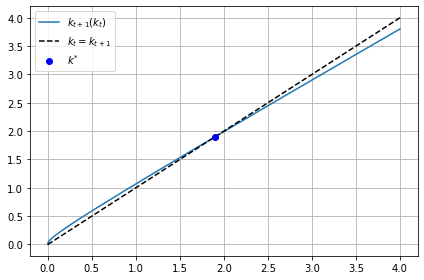

In [41]:
#plot solution
ks = np.linspace(0,4,10000)
ks1 = [transitioneq(k,params) for k in ks]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(ks,ks1,label='$k_{t+1}(k_{t})$')
ax.plot(ks,ks,ls='--',color='black',label='$k_{t}=k_{t+1}$')
ax.plot(kstar,transitioneq(kstar,params),ls='',marker='o',color='blue',label='$k^{*}$')


ax.grid(True)
plt.legend(loc="upper left")
fig.tight_layout()

**Answer:**

In [42]:
f = lambda k: k**alpha
obj_kss = lambda kss: kss - (s*f(kss) + (1-delta)*kss)/((1+g)*(1+n))
result = optimize.root_scalar(obj_kss,bracket=[0.1,100],method='brentq')

print('the steady state for k is',result.root)    

the steady state for k is 1.9038315392313185


**Question D:** Now assume the production function is CES. Find the steady state for $k$ for the various values of $\beta$ shown below.

In [43]:

betas = [-0.5,-0.25,-0.1,-0.05,0.05,0.1,0.25,0.5]

f = lambda k,params: (params['alpha']*k**params['beta']+(1-params['alpha']))**(1/params['beta'])
trans_eq = lambda kss,params:(params['s']*f(kss,params) + (1-params['delta'])*kss)/((1+params['g'])*(1+params['n']))

k_stars = np.empty(len(betas))
for i,beta in enumerate(betas):
    params['beta']=beta
    k_stars[i] = ss_num(trans_eq,params, printit=False)

    print(f'When beta= {beta:5.2f} the steady state for k is {k_stars[i]:.15f}')  

When beta= -0.50 the steady state for k is 1.847129701923042
When beta= -0.25 the steady state for k is 1.873383264875734
When beta= -0.10 the steady state for k is 1.891085641935206
When beta= -0.05 the steady state for k is 1.897358104639712
When beta=  0.05 the steady state for k is 1.910515975173142
When beta=  0.10 the steady state for k is 1.917422135156361
When beta=  0.25 the steady state for k is 1.939590275709855
When beta=  0.50 the steady state for k is 1.982233502409577


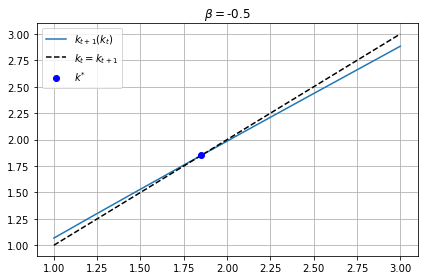

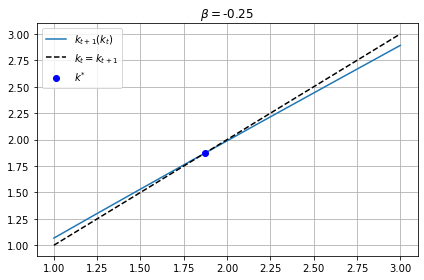

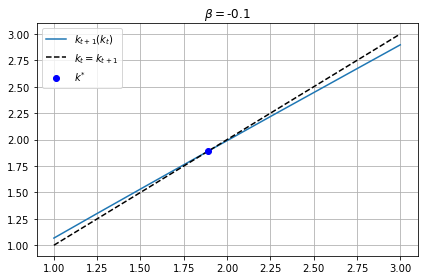

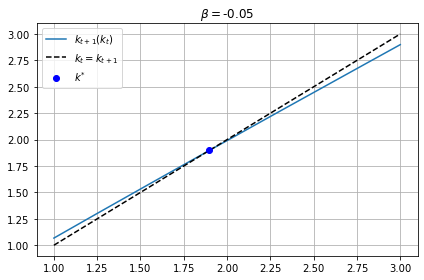

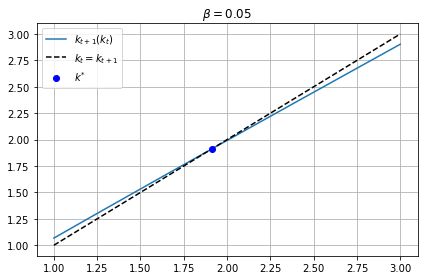

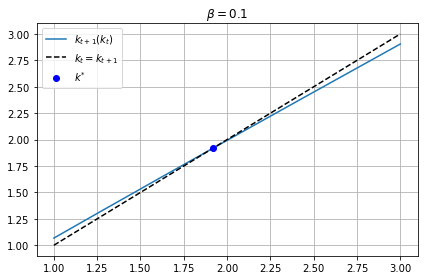

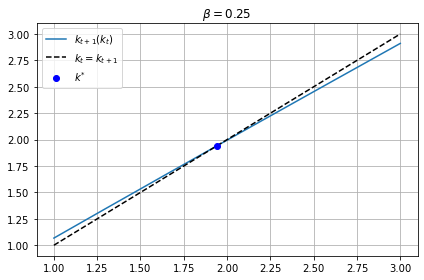

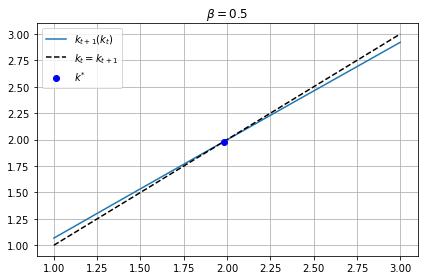

In [44]:

for beta,k_star in zip(betas,k_stars):
    params['beta']=beta
    ks = np.linspace(1,3,10000)
    ks1 = [trans_eq(k,params) for k in ks]

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    ax.plot(ks,ks1,label='$k_{t+1}(k_{t})$')
    ax.plot(ks,ks,ls='--',color='black',label='$k_{t}=k_{t+1}$')
    ax.plot(k_star,transitioneq(k_star,params),ls='',marker='o',color='blue',label='$k^{*}$')

    ax.grid(True)
    plt.title(r'$\beta=$'+f'{beta}')
    plt.legend(loc="upper left")
    fig.tight_layout()

In [45]:
for beta in betas:
    f = lambda k: (alpha*k**beta + (1-alpha))**(1/beta)
    obj_kss = lambda kss: kss - (s*f(kss) + (1-delta)*kss)/((1+g)*(1+n))
    result = optimize.root_scalar(obj_kss,bracket=[0.1,100],method='brentq')
    print(f'for beta = {beta:.3f} the steady state for k is',result.root)    

for beta = -0.500 the steady state for k is 1.8471297000972984
for beta = -0.250 the steady state for k is 1.873383262758588
for beta = -0.100 the steady state for k is 1.8910856397655083
for beta = -0.050 the steady state for k is 1.8973581025712734
for beta = 0.050 the steady state for k is 1.9105159729244352
for beta = 0.100 the steady state for k is 1.917422132817728
for beta = 0.250 the steady state for k is 1.9395902733676993
for beta = 0.500 the steady state for k is 1.9822334997701418
